In [1]:
library(tidyverse)
library(glue)
library(here)
library(bdkn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘glue’

The following object is masked from ‘package:dplyr’:

    collapse

here() starts at /mnt/expressions/mp/nea-over-time

Attaching package: ‘bdkn’

The following object is masked from ‘package:ggplot2’:

    %+%



In [2]:
ascertainments <- c("all", "dinka", "yoruba", "eur", "eas")

In [3]:
times <- c(5000, 10000, 15000)

In [4]:
directions <- c("eur_to_afr", "afr_to_eur", "both_directions", "no_migration")

In [5]:
read_sims <- function(asc, t, direction) {
    list.files(here("data/msprime_sims"),
               glue("ascertainment_{asc}_geneflow_both_afr_{t}_{direction}.*.tsv"),
               full.names = TRUE) %>% 
        map_dfr(
            ~ suppressMessages(read_tsv(.x)) %>% mutate(asc = asc, t = t, direction = direction)
        ) %>%
        gather(stat, value, -c(name, age, asc, t, direction))
}

In [14]:
df <- map_dfr(ascertainments, function(asc)
      map_dfr(times, function(t)
      map_dfr(directions, function(direction) read_sims(asc, t, direction)))) %>%
    mutate(asc = fct_relevel(asc, c("all", "dinka", "yoruba", "eur", "eas")))

In [15]:
table(df$stat)


 admix_prop           d   direct_f4 indirect_f4   true_prop 
      78000       78000       78000       78000       78000 

In [16]:
head(df)

name,age,asc,t,direction,stat,value
eur0,50000,all,5000,eur_to_afr,true_prop,0.04128758
eur1,48000,all,5000,eur_to_afr,true_prop,0.03714294
eur2,46000,all,5000,eur_to_afr,true_prop,0.03078878
eur3,44000,all,5000,eur_to_afr,true_prop,0.03166970
eur4,42000,all,5000,eur_to_afr,true_prop,0.02748173
eur5,40000,all,5000,eur_to_afr,true_prop,0.02808827


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 600 rows containing non-finite values (stat_smooth).”

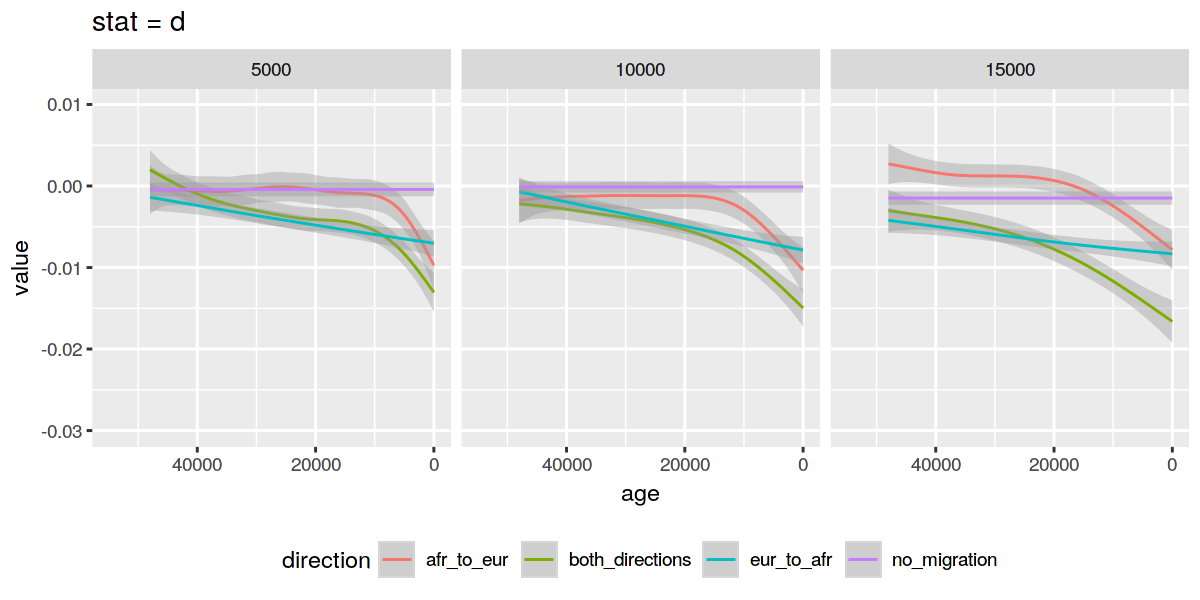

In [70]:
set_dim(8, 4)

(filter(df, stat == "d", asc == "all")  %>%
ggplot(aes(age, value, color = direction)) + geom_smooth(size = 0.5) +
    facet_grid(. ~ t) +
    xlim(55000, 0) +
    theme(legend.position = "bottom") + ggtitle("stat = d") + coord_cartesian(y = c(-0.03, 0.01))) %>% print

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 3000 rows containing non-finite values (stat_smooth).”

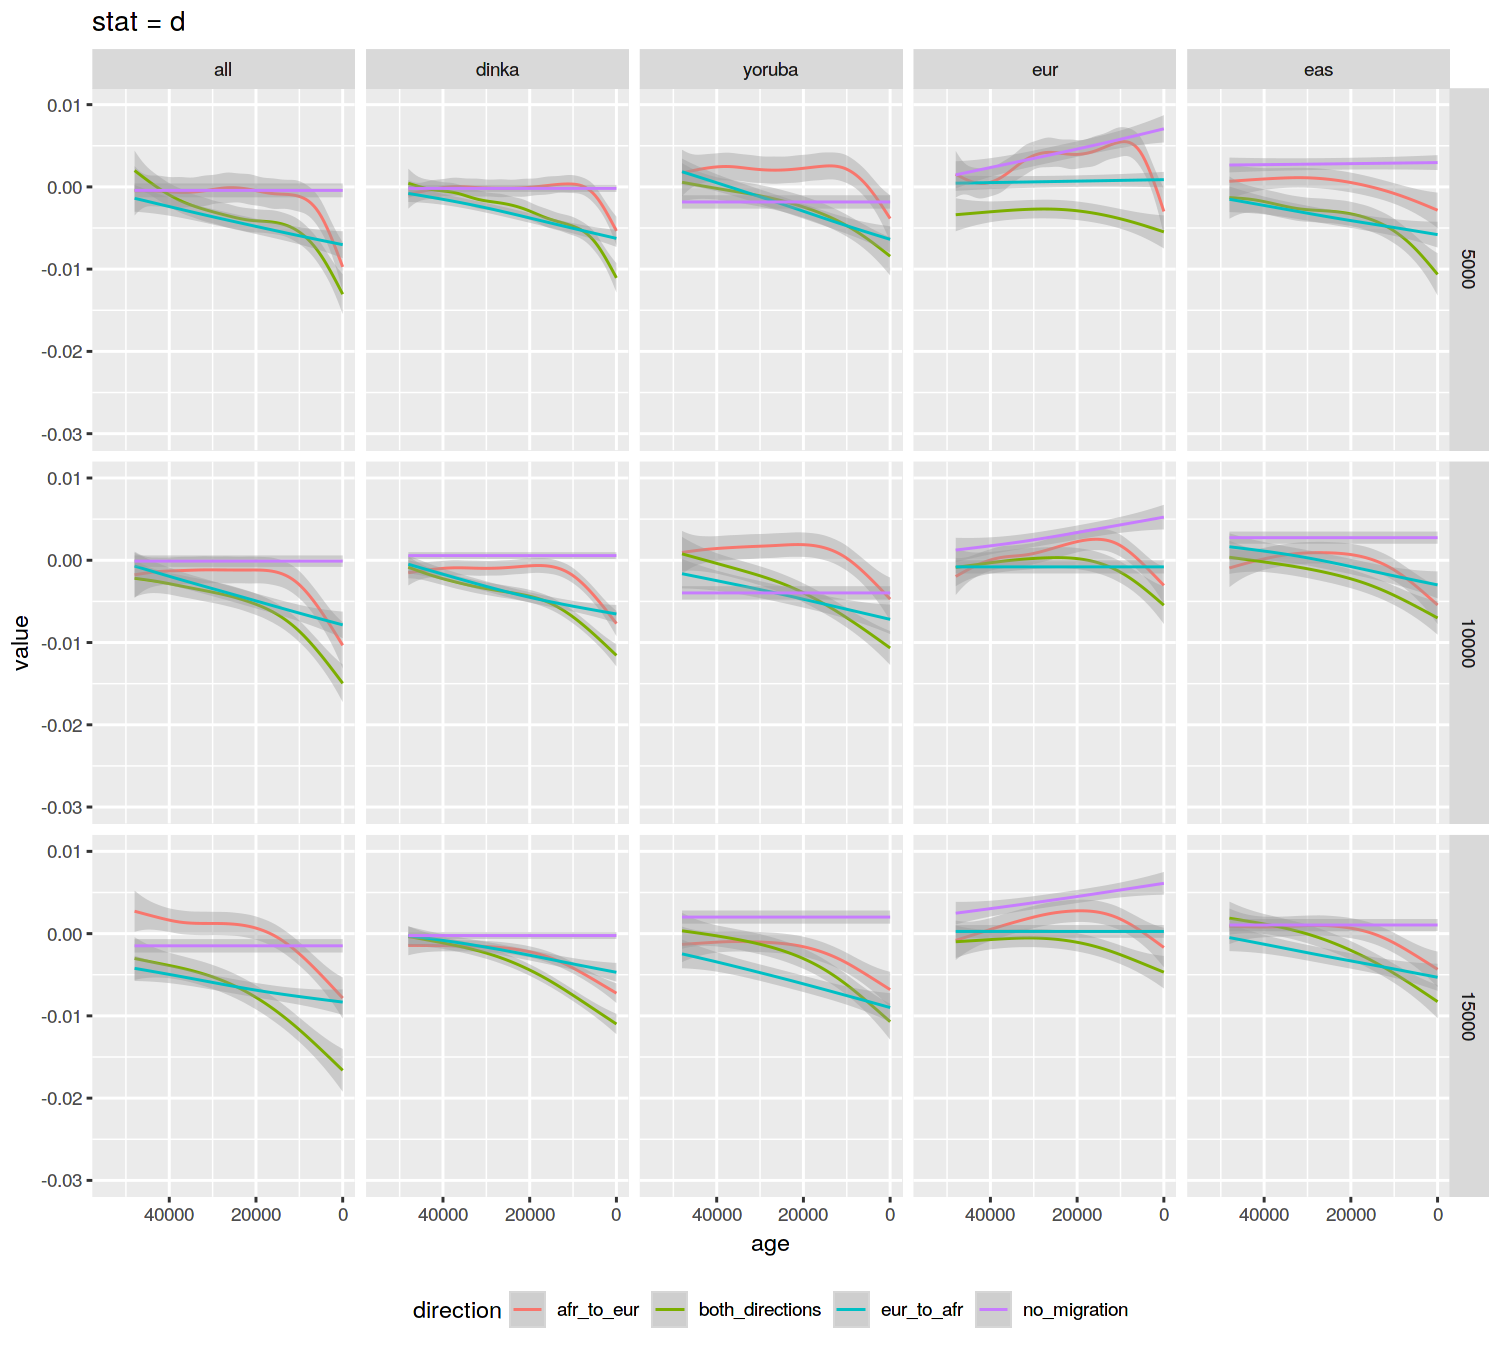

In [58]:
set_dim(10, 9)

(filter(df, stat == "d")  %>%
ggplot(aes(age, value, color = direction)) + geom_smooth(size = 0.5) +
    facet_grid(t ~ asc) +
    xlim(55000, 0) +
    theme(legend.position = "bottom") + ggtitle("stat = d") + coord_cartesian(y = c(-0.03, 0.01))) %>% print

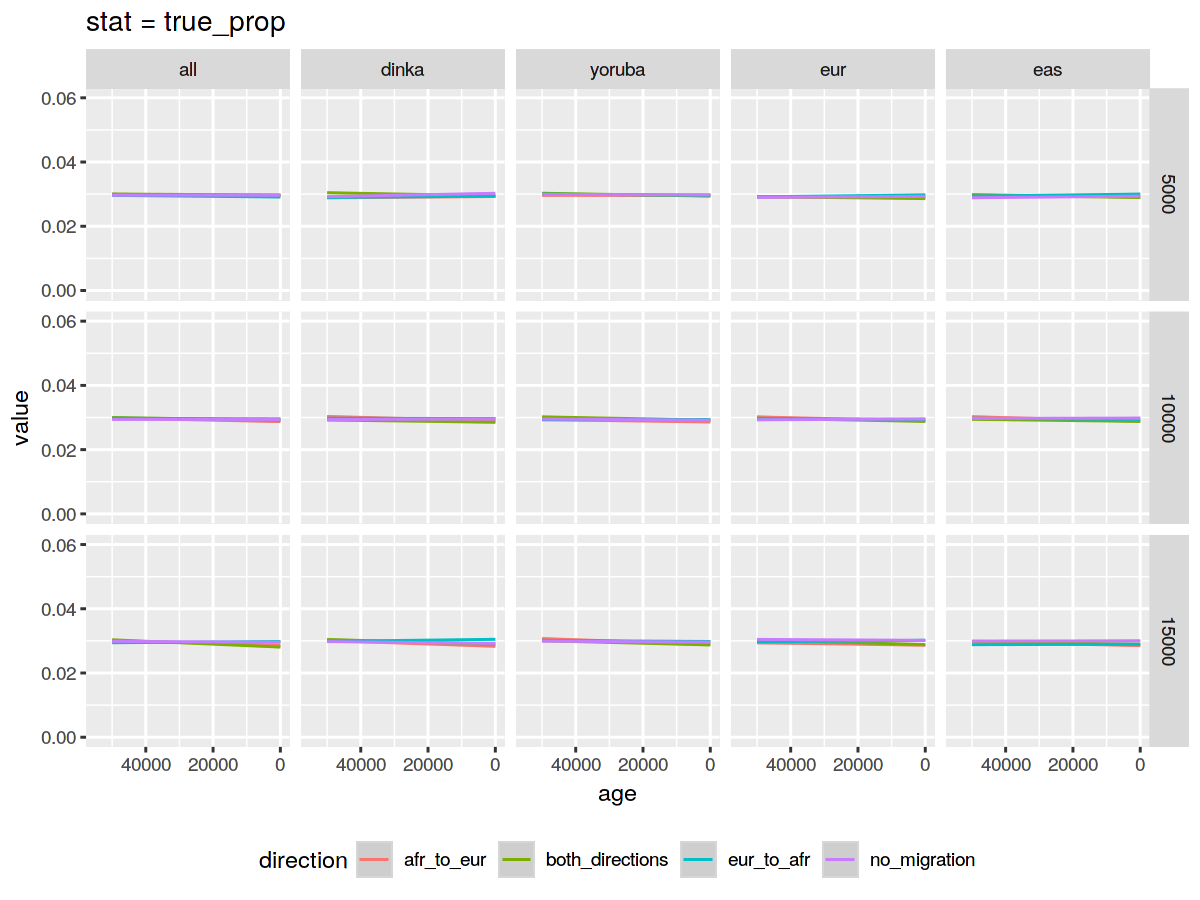

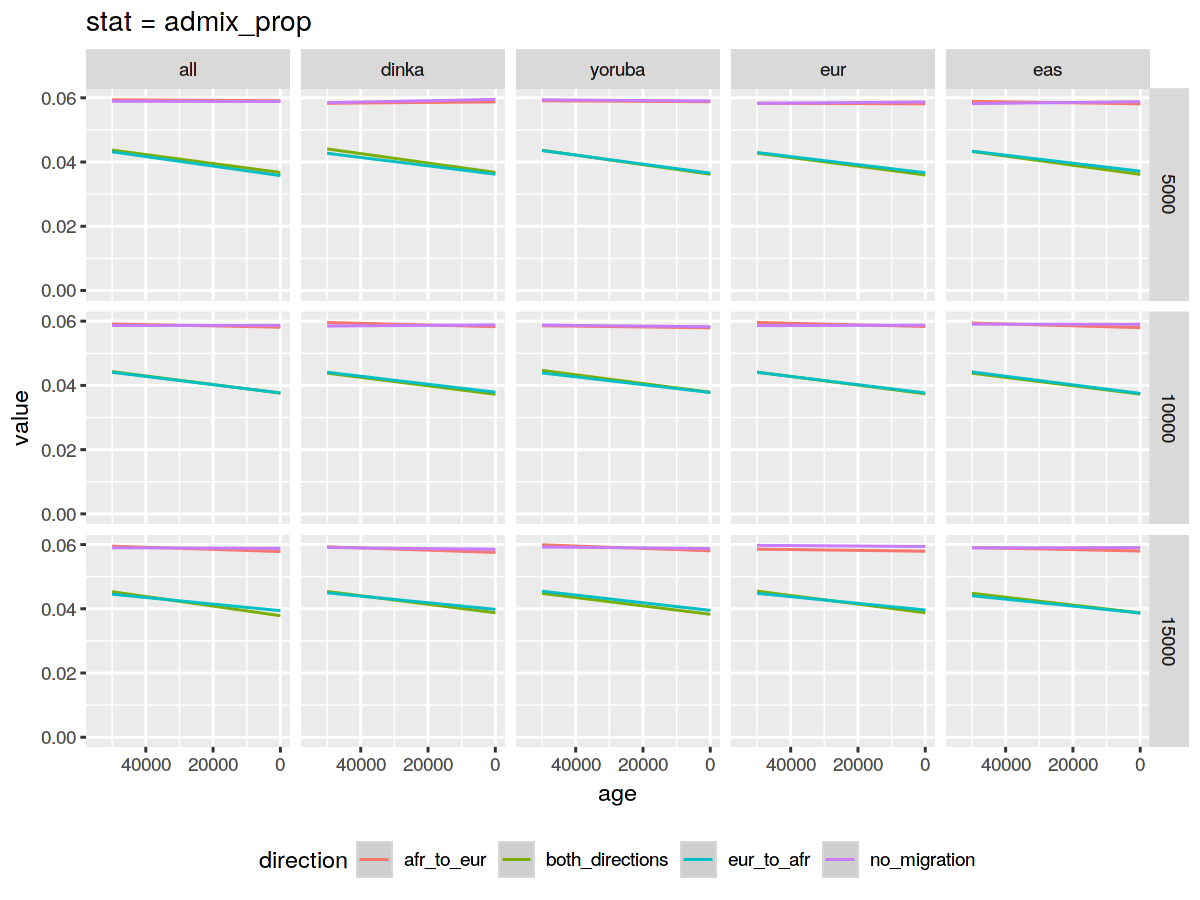

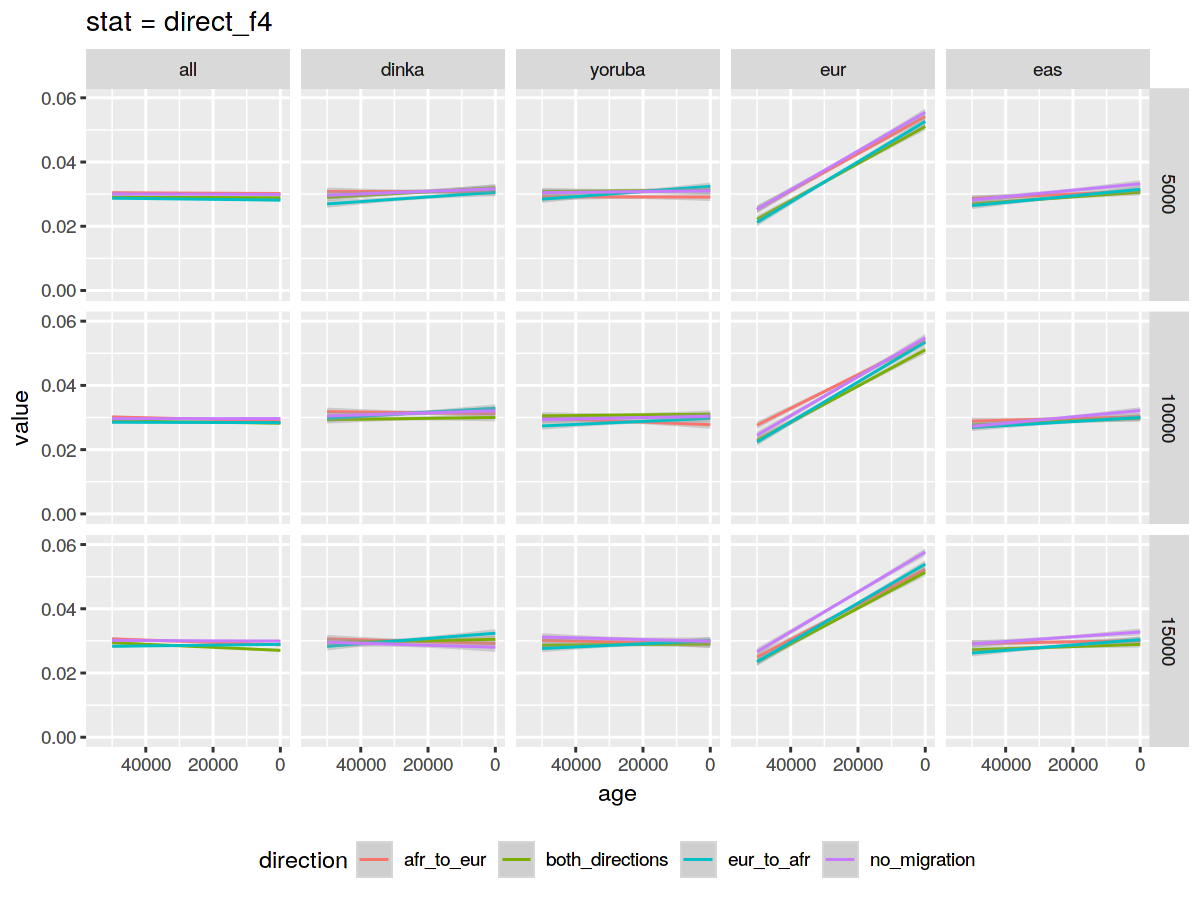

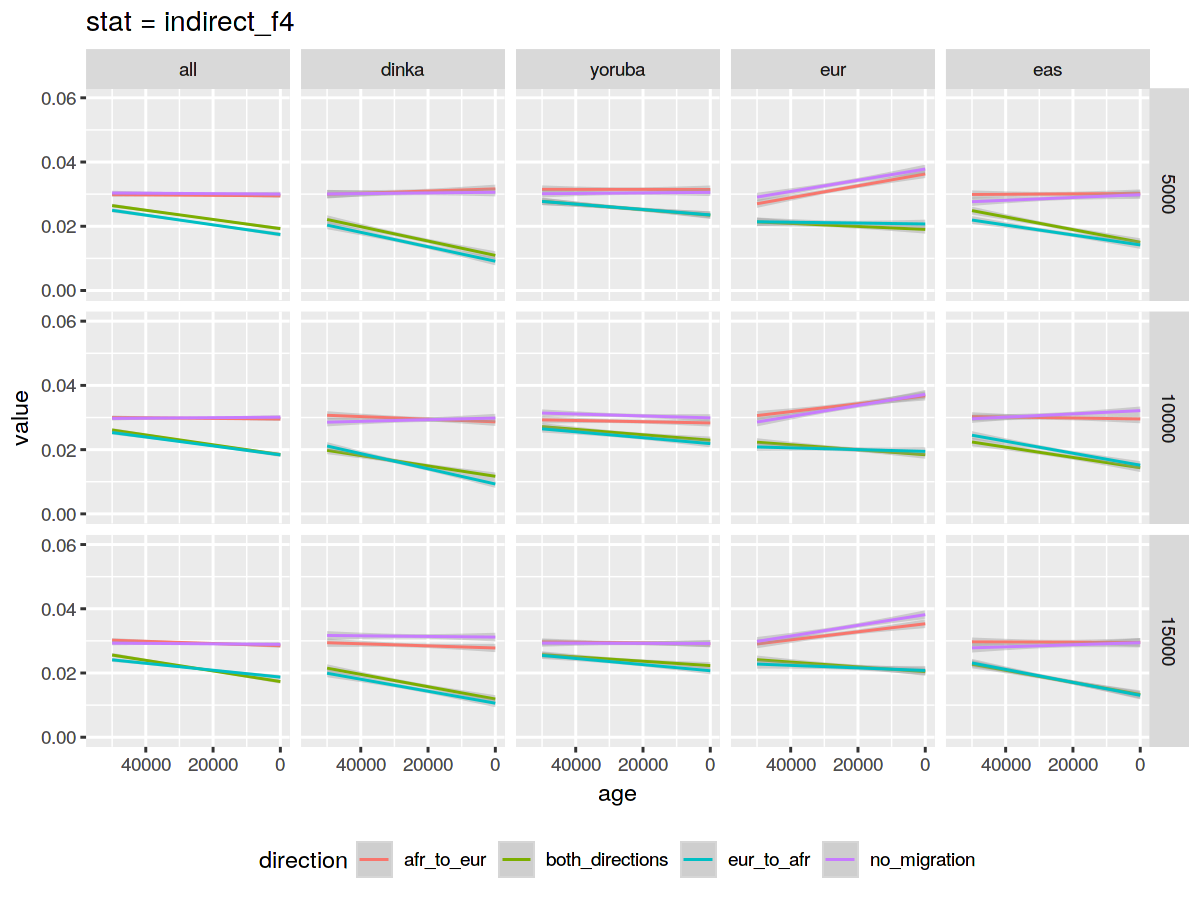

In [67]:
set_dim(8, 6)

for (s in setdiff(unique(df$stat), "d")) {
(filter(df, stat == s)  %>%
ggplot(aes(age, value, color = direction)) + geom_smooth(method = "lm", size = 0.5) +
    facet_grid(t ~ asc) +
    xlim(55000, 0) +
    theme(legend.position = "bottom") + ggtitle("stat = " %+% s) + coord_cartesian(y = c(0, 0.06))) %>% print
}